# 1차원 데이터의 정리
- 데이터의 특징을 파악하는 방법
    - 평균이나 분산 등의 수치 지표에 따라 데이터를 요약
    - 시각적으로 데이터를 조감

## 데이터 중심의 지표
- 데이터를 하나로 요약한 지표
- 대푯값

In [11]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.options.display.precision = 3

In [31]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [32]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [33]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값 (mean)
- array.mean()
- series.mean()
- dataframe.mean()
- np.mean(score) 
- pd.mean() -> 없음

In [34]:
sum(scores) / len(scores)

55.0

In [35]:
np.mean(scores)

55.0

In [36]:
scores.mean()

55.0

In [37]:
scores_df.mean()

score    55.0
dtype: float64

### 중앙값 (median)
- 데이터를 크기 순서대로 나열할 떄 중앙에 위치한 값
- 이상치에 영향을 덜 받음
- 데이터에 큰 이상치가 있는 경우, 대푯값으로 평균보다 중앙값이 적절
- 데이터 개수 n 홀수 : (n+1)/2 번째 데이터가 중앙값
- 데이터 개수 n 짝수 : n/2와  n/2 + 1번째 데이터의 평균이 중앙값
- np.median(socres) 함수
- series, dataframe.median() 메서드

In [38]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [39]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [40]:
np.median(scores)

56.5

In [41]:
scores_df.median()

score    56.5
dtype: float64

### 최빈값 (mode)
- 가장 많이 나타난 값
- 질적 데이터에서 대푯값 구할 때 활용
- datafrade, series.mode()

In [42]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [43]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차 (deviation)
- 각 데이터가 평균으로부터 어느정도 떨어져 있는가
- 편차의 합 = 0

In [44]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [45]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [46]:
np.mean(deviation)

0.0

In [47]:
np.mean(another_deviation)

0.0

In [48]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [49]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산 (variance)
- 편차의 제곱의 평균
- np.var() 함수
- dataframe, series.var() 메서드
- numpy와 pandas에서 분산 값이 다른 이유?
    - numpy 는 표본분산 , pandas 는 불편분산
    - var 메서드의 인수 설정으로 어떤 분산 하는지 명시. ddof = 0 (표본분산) , ddof = 1 (불편분산)

In [50]:
np.mean(deviation ** 2)

86.0

In [51]:
np.var(scores)

86.0

In [52]:
scores_df.var()

score    95.556
dtype: float64

In [53]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [54]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차 (standard deviation)
- 분산에 제곱근을 취함
- np.sqrt(np.var(score))
- np.std(score) 함수
- dataframe, series.std() 메서드

In [55]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [56]:
np.std(scores, ddof=0)

9.273618495495704

### 범위와 4분위수 범위

#### 범위 (Range)
- 데이터의 최댓값과 최솟값만으로 산포도를 표현
- 값이 2개 뿐이라 개략적인 지표이며 이상치에 약함

In [57]:
np.max(scores) - np.min(scores)

28

#### 4분위수 범위 (interquartile range)
- 데이터의 하위 25%, 50%, 75%에 위치하는 값
- 제1분위수, 제2분위수, 제3분위수
- Q1, Q2, Q3
- IQR = Q3-Q1
- Q2는 중앙값과 같음
- np.percentile(score)함수

In [58]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### 데이터의 지표 정리
- 다양한 지표를 한 번에 구할 수 있는 편리한 메서드. 
- dataframe, series.describe()

In [59]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 데이터의 정규화 (normalization)
- 데이터를 통일된 지표로 변환하는 것
- 정규화를 통해 다양한 데이터를 동일한 기준으로 다룰 수 있어 데이터를 분석할 때 정규화는 일반적으로 사용

### 표준화 (standardization)
- 데이터 빼기 평균을 표준편차로 나눔
- 표준화된 데이터를 표준화 변량(standardized data), Z-score라고 함

In [60]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [61]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 편차값

In [62]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [63]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 데이터의 시각화

In [64]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 도수분포표 (frequency distribution table)
- 데이터의 분포를 세부적으로 알고 싶을 때
- 분할된 구간과 데이터의 개수를 표로 정리한 것
- 계급(class), 도수(frequency), 계급폭(class interval), 계급수
- **np.histgram(데이터,bins=계급수, range=(최솟값,최댓값))**
    - **tuple 형태로 반환됨. (빈도, 계급값 시작점)**

In [65]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [67]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


#### 계급값 (class mark)
- 각 계급을 대표하는 값
- 계급의 중앙값

In [68]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

#### 상대도수 (relative frequency)
- 도수분포표에서 각 계급의 도수는 쉽게 알 수 있지만, 각 계급의 도수가 전체에서 차지하는 비율은 한 눈에 알기 어려움
- 상대도수는 그 계급이 전체에서 어느 정도의 비중을 차지하는지를 나타냄
- 상대도수는 백분율로 나타내기도 함
- 어떤 계급의 도수 = 그 계급의 상대도수 * 전체 도수
- 상대도수 = 그 계급의 도수 / 전체 도수
- 상대도수의 합 = 1 (반올림해서 구할 경우엔 1이 아닐 수 있음)

In [69]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 누적상대도수
- 해당 계급까지의 상대도수의 합
- 누적합을 계산할 때 np.cumsum(상대도수)

- 누적도수
    - 어떤 계급의 누적도수 = 그 계급의 도수 + 처음부터 앞 계급까지 도수의 합 (= 그 계급의 도수 + 앞 계급의 누적 도수)
    

In [70]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [71]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토
- **idmax() : series, dataframe에서 가장 큰 값을 가지는 인덱스를 반환하는 메서드. 최댓값의 인덱스를 찾을 수 있음**
- **loc[row_label, column_label]**
    - row_label : 선택하려는 행의 레이블(인덱스) 지정
    - column_label : 선택하려는 열의 레이블(컬럼명) 지정

In [72]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램
- plt.figure()
    - figsize:(width, height)의 튜플을 전달. 단위는 인치
    - dpi : 1인치당 도트 수
    - facecolor : 배경색
    - edgecolor : 외곽선 색
    - *plt.figure()에서는 이미지 영역의 확보일뿐, 그래프에 아무것도 그려지지 않음*
- fig.add_subplot()
    - plt.figure()로 그래프를 그리기 위해서 subplot을 추가할 필요 있음. 
    - add_subplot 메서드 사용
    - fig.add_subplot(111) = fig.add_subplot(1,1,1)
        - 1x1 그리드에서 첫번째 영역
    - subplot은 Axes오브젝트를 반환함. Axes는 그래프의 이미지, 축의 메모리, 라벨의 설정 등을 맡고 있음
- ax.hist(데이터, bins, range)
    - 히스토그램은 hist 메서드로 그림

In [78]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

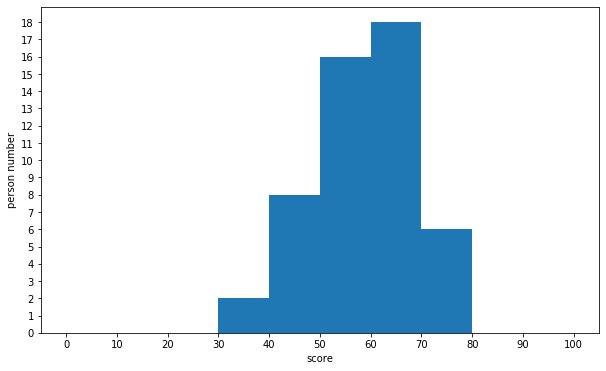

In [43]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6)) 
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

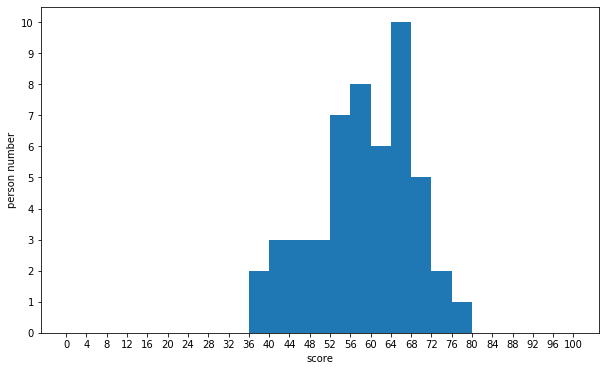

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

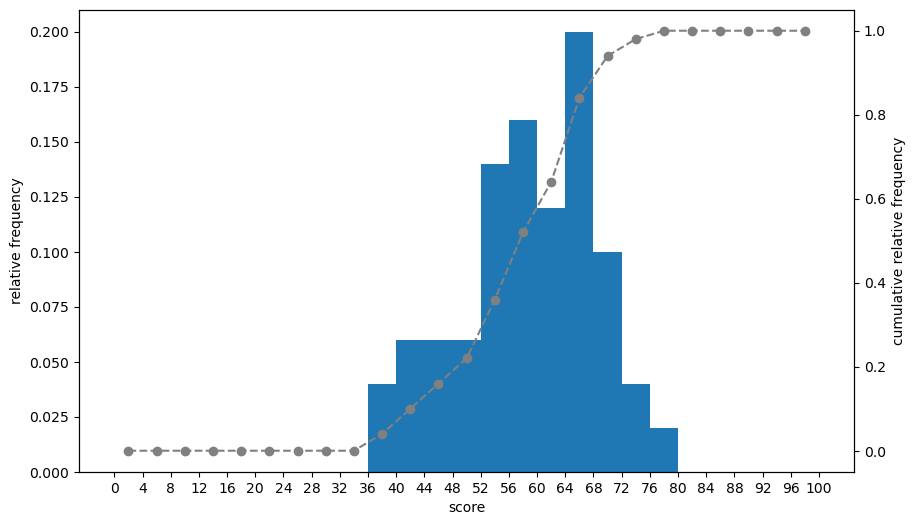

In [80]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림 (box plot)
- 데이터의 산포도를 표현
- 데이터의 분포와 이상치를 시각적으로 파악
- boxplot() 메서드를 사용하여 그릴 수 있음
- IQR = Q3-Q1

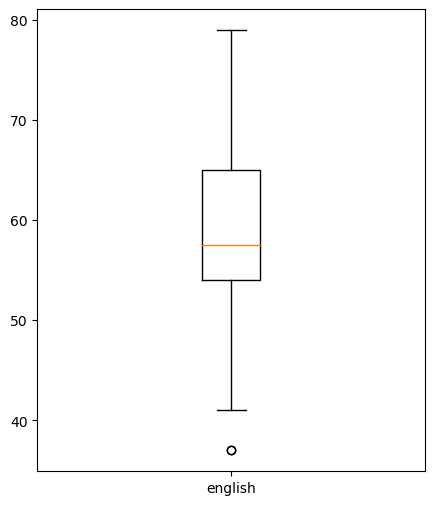

In [83]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

In [84]:
np.ones_like(english_scores)/ len(english_scores)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [85]:
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [86]:
rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.06,
       0.06, 0.06, 0.14, 0.16, 0.12, 0.2 , 0.1 , 0.04, 0.02, 0.  , 0.  ,
       0.  , 0.  , 0.  ])